In [37]:
import os 

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from datasets import load_dataset

In [3]:
wiki = load_dataset("wikipedia", "20220301.en", split="train")

Found cached dataset wikipedia (/home/z1188643/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559)


In [29]:
len(wiki)

6458670

In [40]:
for i in tqdm(range(200000)):
    text = wiki[i]["text"]

    with open(f"wiki/wikitext_{i}.txt", "w") as file:
        file.write(text)

100%|██████████| 200000/200000 [09:17<00:00, 358.72it/s] 


In [5]:
transformer_20000_enc = "comp"
transformer_2000_enc = "comp2000"
arithmetic_enc = "arithmetic_enc"

In [6]:
def get_file_sizes(folder, n_files):
    file_sizes = []
    paths = list(Path(folder).iterdir())
    paths = list(filter(lambda p: int(p.stem.split('_')[1]) < n_files, paths))

    for path in paths:
        file_sizes.append(os.path.getsize(path))
    return file_sizes

### Transformer compressions

#### Compression rate for 200000

In [42]:
# TODO

In [ ]:
transformer_file_sizes200000 = get_file_sizes("comp200000", 50)

In [43]:
sum(transformer_file_sizes200000) / sum(get_file_sizes("wiki", 50))

#### Compression rate for 20000

In [8]:
transformer_file_sizes20000 = get_file_sizes("comp20000", 50)

In [14]:
sum(transformer_file_sizes20000) / sum(get_file_sizes("wiki", 50))

0.13598926681393997

#### Compression rate for 2000

In [9]:
transformer_file_sizes2000 = get_file_sizes("comp2000", 50)

In [15]:
sum(transformer_file_sizes2000) / sum(get_file_sizes("wiki", 50))

0.2364710567861758

### 7z

In [27]:
os.path.getsize("wiki50.7z") / sum(get_file_sizes("wiki", 50))

0.3431940540556028

In [28]:
os.path.getsize("wiki.7z") / sum(get_file_sizes("wiki", 200))

0.28529354171231947

In [32]:
os.path.getsize("wiki2000.7z") / sum(get_file_sizes("wiki", 2000))

0.2705528756721797

In [41]:
os.path.getsize("wiki.7z") / sum(get_file_sizes("wiki", 200000))

0.26231324318019716

### Arithmetic coding baseline

for some reason it uses more space than uncompressed files

In [ ]:
arithmetic_file_sizes = get_file_sizes(arithmetic_enc, 200)

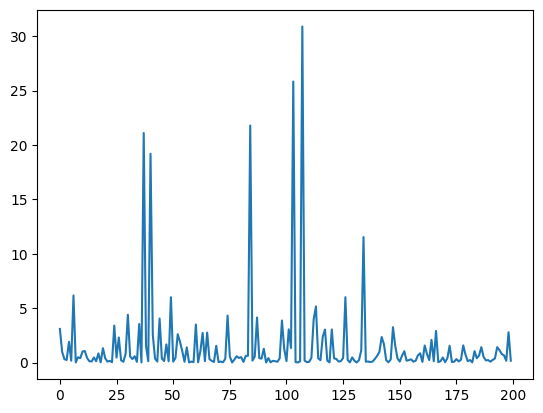

In [22]:
plt.plot(np.array(arithmetic_file_sizes) / np.array(get_file_sizes("wiki", 200)))